In [1]:
import os
import sys
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import DrDataLoader, prepare_ds
plt.style.use('fivethirtyeight')

load_dotenv(find_dotenv())

data_loader = DrDataLoader(Path('../') / Path(os.getenv('RAW_FP'))) #type: ignore

def show_helper(image, ax, label=None):
    ax.imshow(tf.reshape(image, [28,28]), cmap='gray_r', interpolation='None')
    if label is not None:
         ax.set_title('Label: {}'.format(label))
    ax.set_axis_off()
    return ax


2022-12-03 12:06:10.327397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
SPLIT_SIZE = 0.8
BATCH_SIZE = 64
data_loader = DrDataLoader(Path('../') / Path(os.getenv('RAW_FP'))) #type: ignore
train_ds_orig, val_ds = tf.keras.utils.split_dataset(
            data_loader.load_training_data(),
            left_size = SPLIT_SIZE,
            shuffle=True
        )
train_ds = prepare_ds(
    ds=train_ds_orig,
    batch_size=BATCH_SIZE,
    rotation_factor = 0.05,
    translation_factor= (0.1, 0.1),
    rescale_factor=1./255.,
    brightness_factor = 0.1,
    ) #type: ignore

val_ds = prepare_ds(
    ds = val_ds,
    batch_size = BATCH_SIZE
) #type: ignore

2022-12-03 12:06:20.019693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


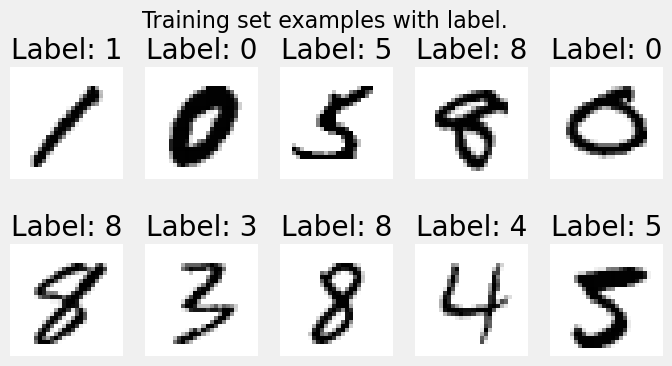

In [3]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for (im, im_label) in train_ds_orig.take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, im_label)
    i+=1
fig.suptitle('Training set examples with label.', fontsize=16)
plt.show()

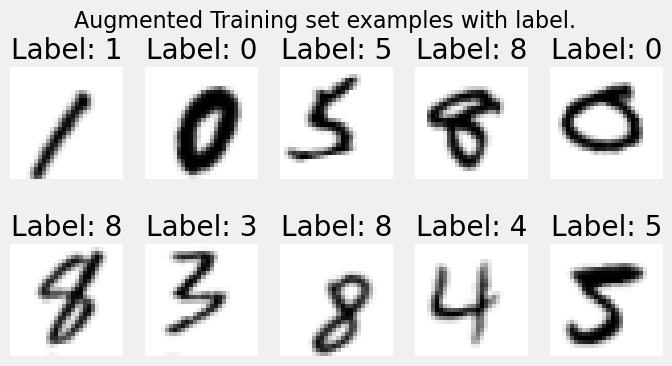

In [4]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for (im, im_label) in train_ds.unbatch().take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, im_label)
    i+=1
fig.suptitle('Augmented Training set examples with label.', fontsize=16)
plt.show()